Initial Helper Function to display graph


In [51]:
"""
kr_helper_funcs.py - generic helper functions that can be used across Tensorflow & Keras DL code
@author: Manish Bhobe
Use this code at your own risk. I am not responsible if your computer explodes of GPU gets fried :P
Usage: 
    - to import functions from this module, copy the py file to your project folder
    - import code as follows:
        from helper_funcs import *
"""

# imports & tweaks
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import os
import itertools

seed = 123
np.random.seed(seed)

# -----------------------------------------------------------------------------------------------
# Generic helper functions 
# -----------------------------------------------------------------------------------------------
def progbar_msg(curr_tick, max_tick, head_msg, tail_msg, final=False):
    # --------------------------------------------------------------------
    # Keras like progress bar, used when copying files to show progress
    # --------------------------------------------------------------------
    progbar_len = 30
    len_max_tick = len(str(max_tick))

    if not final:
        prog = (curr_tick * progbar_len) // max_tick
        bal = progbar_len - (prog + 1)
        prog_msg = '  %s (%*d/%*d) [%s%s%s] %s%s' % (
            head_msg, len_max_tick, curr_tick, len_max_tick, max_tick, '=' * prog, '>', '.' * bal,
            tail_msg, ' ' * 35)
        print('\r%s' % prog_msg, end='', flush=True)
    else:
        prog_msg = '  %s (%*d/%*d) [%s] %s%s\n' % (
            head_msg, len_max_tick, max_tick, len_max_tick, max_tick, '=' * progbar_len, tail_msg,
            ' ' * 35)
        print('\r%s' % prog_msg, end='', flush=True)

def show_plots(history, plot_title=None, fig_size=None):
    """ Useful function to view plot of loss values & accuracies across the various epochs
        Works with the history object returned by the train_model(...) call """
    assert type(history) is dict

    # NOTE: the history object should always have loss & acc (for training data), but MAY have
    # val_loss & val_acc for validation data
    loss_vals = history['loss']
    val_loss_vals = history['val_loss'] if 'val_loss' in history.keys() else None
    epochs = range(1, len(history['accuracy']) + 1)

    f, ax = plt.subplots(nrows=1, ncols=2, figsize=((16, 4) if fig_size is None else fig_size))

    # plot losses on ax[0]
    ax[0].plot(epochs, loss_vals, color='navy', marker='o', linestyle=' ', label='Training Loss')
    if val_loss_vals is not None:
        ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
        ax[0].set_title('Training & Validation Loss')
        ax[0].legend(loc='best')
    else:
        ax[0].set_title('Training Loss')

    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].grid(True)

    # plot accuracies
    acc_vals = history['accuracy']
    val_acc_vals = history['val_accuracy'] if 'val_accuracy' in history.keys() else None

    ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls=' ', label='Training Accuracy')
    if val_acc_vals is not None:
        ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
        ax[1].set_title('Training & Validation Accuracy')
        ax[1].legend(loc='best')
    else:
        ax[1].set_title('Training Accuracy')

    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].grid(True)

    if plot_title is not None:
        plt.suptitle(plot_title)

    plt.show()
    plt.close()

    # delete locals from heap before exiting (to save some memory!)
    del loss_vals, epochs, acc_vals
    if val_loss_vals is not None:
        del val_loss_vals
    if val_acc_vals is not None:
        del val_acc_vals

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def time_taken_as_str(start_time, end_time):
    secs_elapsed = end_time - start_time

    SECS_PER_MIN = 60
    SECS_PER_HR = 60 * SECS_PER_MIN

    hrs_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_HR)
    mins_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_MIN)

    if hrs_elapsed > 0:
        ret = '%d hrs %d mins %d secs' % (hrs_elapsed, mins_elapsed, secs_elapsed)
    elif mins_elapsed > 0:
        ret = 'Time taken: %d mins %d secs' % (mins_elapsed, secs_elapsed)
    elif secs_elapsed > 1:
        ret = 'Time taken: %d secs' % (secs_elapsed)
    else:
        ret = 'Time taken - less than 1 sec'
    return ret

def save_keras_model(model, base_file_name, save_dir=os.path.join('.','keras_models')):
    """ save the model structure to JSON & weights to HD5 """    
    # check if save_dir exists, else create it
    if not os.path.exists(save_dir):
        try:
            os.mkdir(save_dir)
        except OSError as err:
            print("Unable to create folder {} to save Keras model. Can't continue!".format(save_dir))
            raise err
            
    # model structure is saved to $(save_dir)/base_file_name.json
    # weights are saved to $(save_dir)/base_file_name.h5
    model_json = model.to_json()
    json_file_path = os.path.join(save_dir, (base_file_name + ".json"))
    h5_file_path = os.path.join(save_dir, (base_file_name + ".h5"))            

    with open(json_file_path, "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5\n",
    model.save_weights(h5_file_path)
    print("Saved model to files %s and %s" % (json_file_path, h5_file_path))

def load_keras_model(base_file_name, load_dir=os.path.join('.', 'keras_models')):
    """ loads model structure & weights from previously saved state """
    # model structure is loaded $(load_dir)/base_file_name.json
    # weights are loaded from $(load_dir)/base_file_name.h5

    from keras.models import model_from_json

    # load model from save_path
    loaded_model = None
    json_file_path = os.path.join(load_dir, (base_file_name + ".json"))
    h5_file_path = os.path.join(load_dir, (base_file_name + ".h5"))

    if os.path.exists(json_file_path) and os.path.exists(h5_file_path):
        with open(json_file_path, "r") as json_file:
            loaded_model_json = json_file.read()
            loaded_model = model_from_json(loaded_model_json)
            loaded_model.load_weights(h5_file_path)
        print("Loaded model from files %s and %s" % (json_file_path, h5_file_path))
    else:
        msg = "Model file(s) not found in %s! Expecting to find %s and %s in this directory." % (
            load_dir, (base_file_name + ".json"), (base_file_name + ".h5"))
        raise IOError(msg)
    return loaded_model


In [44]:
from __future__ import division

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pickle
import matplotlib.pyplot as plt
import torchvision
import torch.utils.data as data_utils
import math
import numpy as np
import subprocess
import random
import copy
import argparse
import os
import pandas as pd 
import io 
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras import optimizers

from torch.autograd import Variable
from torch.autograd import gradcheck
from PIL import Image
from torchvision import datasets, transforms
from IPython.core.debugger import set_trace
from torch.nn.parameter import Parameter
from torch.nn import init
from torch.nn import Module
from sklearn.datasets import fetch_openml
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


Import MNIST dataset

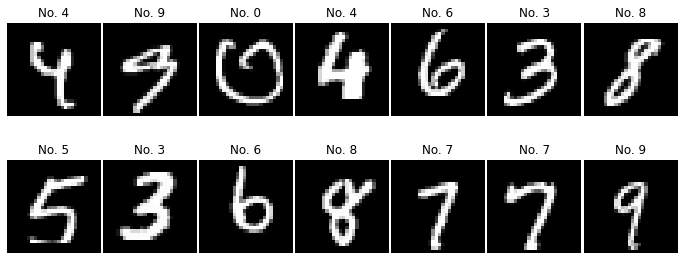

In [45]:
from keras.datasets.mnist import load_data

# load the data - it returns 2 tuples of digits & labels - one for
# the train set & the other for the test set
(train_digits, train_labels), (test_digits, test_labels) = load_data()

# display 14 random images from the training set
import numpy as np
np.random.seed(123)

rand_14 = np.random.randint(0, train_digits.shape[0],14)
sample_digits = train_digits[rand_14]
sample_labels = train_labels[rand_14]
# code to view the images
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % sample_labels[image_index])
plt.show()
plt.close()

In [46]:
# some variables...
image_height = train_digits.shape[1]  
image_width = train_digits.shape[2]
num_channels = 1  # we have grayscale images
# NOTE: image_height == image_width == 28

# re-shape the images data
train_data = np.reshape(train_digits, (train_digits.shape[0], image_height, image_width, num_channels))
test_data = np.reshape(test_digits, (test_digits.shape[0],image_height, image_width, num_channels))

# re-scale the image data to values between (0.0,1.0]
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

# one-hot encode the labels - we have 10 output classes
# so 3 -> [0 0 0 1 0 0 0 0 0 0], 5 -> [0 0 0 0 0 1 0 0 0 0] & so on
from keras.utils import to_categorical
num_classes = 10
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)
train_labels_cat.shape, test_labels_cat.shape

((60000, 10), (10000, 10))

In [47]:
# shuffle the training dataset (5 times!)
for _ in range(5): 
    indexes = np.random.permutation(len(train_data))

train_data = train_data[indexes]
train_labels_cat = train_labels_cat[indexes]

# now set-aside 10% of the train_data/labels as the
# cross-validation sets
val_perc = 0.10
val_count = int(val_perc * len(train_data))

# first pick validation set from train_data/labels
val_data = train_data[:val_count,:]
val_labels_cat = train_labels_cat[:val_count,:]

# leave rest in training set
train_data2 = train_data[val_count:,:]
train_labels_cat2 = train_labels_cat[val_count:,:]

# NOTE: We will train on train_data2/train_labels_cat2 and 
# cross-validate on val_data/val_labels_cat

In [48]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model():
    model = Sequential()
    # add Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=(image_height, image_width, num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Flatten())
    # Densely connected layers
    model.add(Dense(128, activation='relu'))
    # output layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile with adam optimizer & categorical_crossentropy loss function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [49]:
results = model.fit(train_data2, train_labels_cat2, 
                    epochs=15, batch_size=64,
                    validation_data=(val_data, val_labels_cat))

Epoch 1/15
844/844 [==============================] - 81s 96ms/step - loss: 0.1909 - accuracy: 0.9400 - val_loss: 0.0723 - val_accuracy: 0.9778
Epoch 2/15
844/844 [==============================] - 78s 92ms/step - loss: 0.0514 - accuracy: 0.9835 - val_loss: 0.0392 - val_accuracy: 0.9872
Epoch 3/15
844/844 [==============================] - 76s 90ms/step - loss: 0.0350 - accuracy: 0.9889 - val_loss: 0.0273 - val_accuracy: 0.9913
Epoch 4/15
844/844 [==============================] - 76s 90ms/step - loss: 0.0287 - accuracy: 0.9908 - val_loss: 0.0343 - val_accuracy: 0.9893
Epoch 5/15
844/844 [==============================] - 76s 90ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0258 - val_accuracy: 0.9922
Epoch 6/15
844/844 [==============================] - 77s 91ms/step - loss: 0.0184 - accuracy: 0.9943 - val_loss: 0.0462 - val_accuracy: 0.9858
Epoch 7/15
844/844 [==============================] - 76s 90ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0291 - val_accuracy:

Plotting Training & Validation Loss VS Training & Validation Accuracy

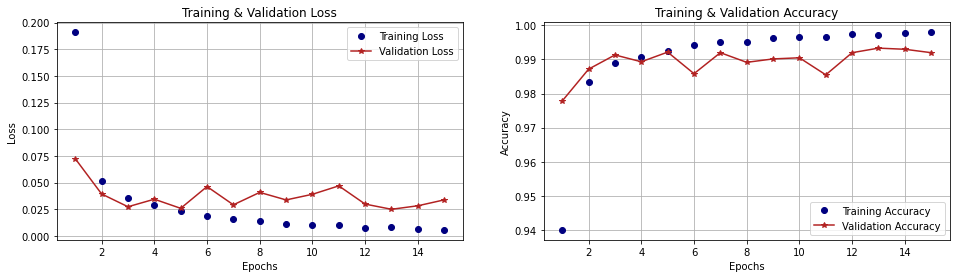

In [52]:
# display plots...
show_plots(results.history)

**Evaluating the model against Test**

In [39]:
test_loss, test_accuracy = \
  model.evaluate(test_data, test_labels_cat, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

157/157 [==============================] - 4s 26ms/step - loss: 0.0505 - accuracy: 0.9886
Test loss: 0.0505 accuracy: 0.9886


**Predictions on Test Data. We will use the first 20 predictions**

In [42]:
predictions = model.predict(test_data)
first20_preds = np.argmax(predictions, axis=1)[:25]
first20_true = np.argmax(test_labels_cat,axis=1)[:25]
print(first20_preds)
print(first20_true)


[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]


**Part 2**



Now we will rotate the MNIST data set.

In [55]:
# imports & tweaks
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, time
# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize'] = (8,6)
sns.set_style('darkgrid')
sns.set_context('talk')
sns.set_style({'font.sans-serif':['Verdana','Arial','Calibri','DejaVu Sans']})
%matplotlib inline

# NOTE: Always use a seed for random number generators, so you get same results across runs
# you can use any number as the seed 
seed = 123
np.random.seed(seed)

In [58]:
# rand_14 = np.random.randint(0, train_digits.shape[0],14)
sample_digits = train_digits
sample_labels = train_labels

BEFORE:



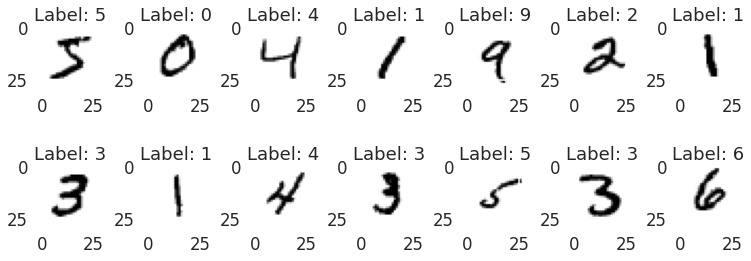

AFTER:



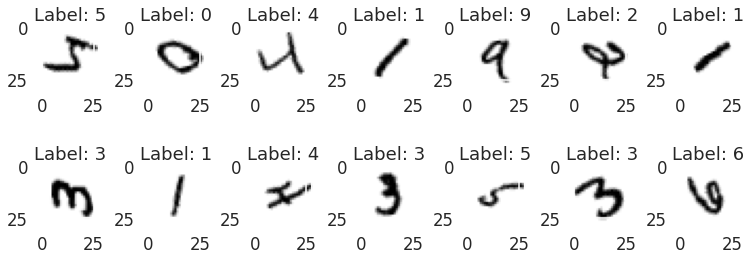

In [60]:
# specify the maximum rotation_range angle
rotation_range_val = 100

# create the class object
datagen = ImageDataGenerator(rotation_range=rotation_range_val)
# fit the generator
datagen.fit(sample_digits.reshape(sample_digits.shape[0], 28, 28, 1))



# define number of rows & columns
num_row = 2
num_col = 7
num= num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(sample_digits[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(sample_labels[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(sample_digits.reshape(sample_digits.shape[0], 28, 28, 1),sample_labels.reshape(sample_labels.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()

In [70]:


rotated_results = model.fit(datagen.flow(train_data2, train_labels_cat2, 
                     batch_size=64), epochs=15, validation_data=(val_data, val_labels_cat))

Epoch 1/15
844/844 [==============================] - 84s 100ms/step - loss: 0.0588 - accuracy: 0.9818 - val_loss: 0.0494 - val_accuracy: 0.9858
Epoch 2/15
844/844 [==============================] - 84s 100ms/step - loss: 0.0566 - accuracy: 0.9822 - val_loss: 0.0519 - val_accuracy: 0.9855
Epoch 3/15
844/844 [==============================] - 88s 104ms/step - loss: 0.0525 - accuracy: 0.9841 - val_loss: 0.0474 - val_accuracy: 0.9877
Epoch 4/15
844/844 [==============================] - 84s 100ms/step - loss: 0.0524 - accuracy: 0.9841 - val_loss: 0.0398 - val_accuracy: 0.9890
Epoch 5/15
844/844 [==============================] - 84s 99ms/step - loss: 0.0496 - accuracy: 0.9847 - val_loss: 0.0521 - val_accuracy: 0.9847
Epoch 6/15
844/844 [==============================] - 88s 104ms/step - loss: 0.0463 - accuracy: 0.9852 - val_loss: 0.0372 - val_accuracy: 0.9890
Epoch 7/15
844/844 [==============================] - 85s 101ms/step - loss: 0.0464 - accuracy: 0.9855 - val_loss: 0.0469 - val_acc

Rotated MNIST Plotting Training & Validation Loss VS Training & Validation Accuracy

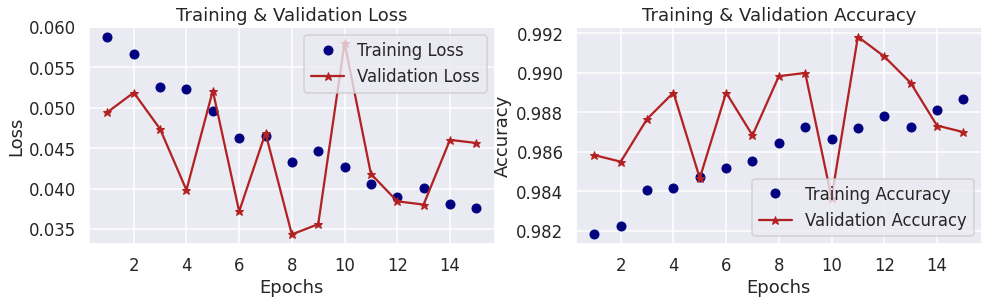

In [72]:
# display plots...
show_plots(rotated_results.history)

**Evaluating the model against Test Data**

In [73]:
test_loss, test_accuracy = \
  model.evaluate(test_data, test_labels_cat, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

157/157 [==============================] - 4s 26ms/step - loss: 0.0431 - accuracy: 0.9868
Test loss: 0.0431 accuracy: 0.9868


In [74]:
predictions = model.predict(test_data)
first20_preds = np.argmax(predictions, axis=1)[:25]
first20_true = np.argmax(test_labels_cat,axis=1)[:25]
print(first20_preds)
print(first20_true)

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
